# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import random
import os

from chart_studio.plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [2]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV

## 1.1 Reading Data

In [3]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
project_data = project_data.sample(n=5000)

In [6]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
79026,139722,p182545,22460c54072bd0cf958cc8349fac8b8f,Ms.,CA,2016-04-27 02:02:27,Grades 3-5,"Math & Science, History & Civics","Applied Sciences, History & Geography",21st Century Learning with Multimedia,It’s not enough to read a book and write an es...,My students come from diverse family situation...,"Igniting imagination, problem solving and coop...",21st Century teaching is more than technology;...,My students need an iPad Mini/accessories to p...,0,0
5145,50256,p203475,63e9a9f2c9811a247f1aa32ee6f92644,Mrs.,CA,2016-04-27 08:45:34,Grades 3-5,Literacy & Language,Literacy,Books to Power Powerful Book Clubs!,Do you remember the book you read that made yo...,My students are part of an exciting adventure....,"We are fortunate enough to be a \""project scho...",As a new teacher my book shelves are bare or t...,My students need books to help support their h...,6,1


In [7]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [8]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

## 1.2 preprocessing of `project_subject_categories`

In [9]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

#from collections import Counter
#my_counter = Counter()
#for word in project_data['clean_categories'].values:
#    my_counter.update(word.split())
#
#cat_dict = dict(my_counter)
#sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [10]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
#my_counter = Counter()
#for word in project_data['clean_subcategories'].values:
#    my_counter.update(word.split())
#    
#sub_cat_dict = dict(my_counter)
#sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [11]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

project_data.drop(['project_essay_1','project_essay_2','project_essay_3','project_essay_4'], axis=1, inplace=True)

In [12]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,essay
0,139722,p182545,22460c54072bd0cf958cc8349fac8b8f,Ms.,CA,2016-04-27 02:02:27,Grades 3-5,21st Century Learning with Multimedia,My students need an iPad Mini/accessories to p...,0,0,495.29,6,Math_Science History_Civics,AppliedSciences History_Geography,It’s not enough to read a book and write an es...
1,50256,p203475,63e9a9f2c9811a247f1aa32ee6f92644,Mrs.,CA,2016-04-27 08:45:34,Grades 3-5,Books to Power Powerful Book Clubs!,My students need books to help support their h...,6,1,142.18,66,Literacy_Language,Literacy,Do you remember the book you read that made yo...


In [13]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [14]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)

It’s not enough to read a book and write an essay to connect with and deeply understand core subjects. I want to engage my students' imagination, creativity, and reasoning. I hope by introducing the creative and problem-solving skills required of movie making, I will jump start their future.My students come from diverse family situations with an increasing number from lower income levels. We were recently re-designated a Title I school (students receive free breakfast and lunch).  Many have non-English speaking parents, working multiple jobs. I have a disproportionate number of struggling readers (2 years behind).  They are good kids, who want to improve their skills, but traditional methods don’t seem to help. They become easily frustrated and unmotivated.  When I use creative approaches -- student-written plays, comic strips, and presentations -- they are engaged and produce higher quality work while displaying greater confidence with the material.  I want these productive times to i

In [15]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [16]:
sent = decontracted(project_data['essay'].values[200])
print(sent)
print("="*50)

Our school is developing an outdoor facility for students during lunch. I would love to offer students the opportunity to engage in athletic activities, but our school is resources are very limited! \r\n\r\nAs both a teacher and an athlete, I know the important role physical activity plays in developing \"grit\" and building self-confidence in our youth. These are important qualities that will serve my students well throughout their lives. Students that engage in physical activity are also more focused and alert in the classroom thus promoting student academic engagement.Each day after lunch, my students are allowed to go outside to enjoy the outdoors. However, many spend time playing video games or texting on their cellphones. This is hardly surprising after taking a tour of the outside play yard. Students have no balls or equipment to use; there is merely grass and concert. \r\n\r\nI would love to spice up my students outdoor experience by providing them with games and activities to 

In [17]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Our school is developing an outdoor facility for students during lunch. I would love to offer students the opportunity to engage in athletic activities, but our school is resources are very limited!     As both a teacher and an athlete, I know the important role physical activity plays in developing  grit  and building self-confidence in our youth. These are important qualities that will serve my students well throughout their lives. Students that engage in physical activity are also more focused and alert in the classroom thus promoting student academic engagement.Each day after lunch, my students are allowed to go outside to enjoy the outdoors. However, many spend time playing video games or texting on their cellphones. This is hardly surprising after taking a tour of the outside play yard. Students have no balls or equipment to use; there is merely grass and concert.     I would love to spice up my students outdoor experience by providing them with games and activities to utilize ou

In [18]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Our school is developing an outdoor facility for students during lunch I would love to offer students the opportunity to engage in athletic activities but our school is resources are very limited As both a teacher and an athlete I know the important role physical activity plays in developing grit and building self confidence in our youth These are important qualities that will serve my students well throughout their lives Students that engage in physical activity are also more focused and alert in the classroom thus promoting student academic engagement Each day after lunch my students are allowed to go outside to enjoy the outdoors However many spend time playing video games or texting on their cellphones This is hardly surprising after taking a tour of the outside play yard Students have no balls or equipment to use there is merely grass and concert I would love to spice up my students outdoor experience by providing them with games and activities to utilize outside Students would lo

In [19]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [20]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1601.22it/s]


In [21]:
# after preprocesing
preprocessed_essays[200]

'school developing outdoor facility students lunch would love offer students opportunity engage athletic activities school resources limited teacher athlete know important role physical activity plays developing grit building self confidence youth important qualities serve students well throughout lives students engage physical activity also focused alert classroom thus promoting student academic engagement day lunch students allowed go outside enjoy outdoors however many spend time playing video games texting cellphones hardly surprising taking tour outside play yard students no balls equipment use merely grass concert would love spice students outdoor experience providing games activities utilize outside students would love opportunity play basketball organize game volleyball please help us get students outside enjoying nature nannan'

In [22]:
project_data['essay'] = preprocessed_essays

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [23]:
# similarly you can preprocess the titles also

In [24]:
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 32327.74it/s]


In [25]:
project_data['project_title'] = preprocessed_titles

## 1.5 Preparing data for models

In [26]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [27]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,essay
0,139722,p182545,22460c54072bd0cf958cc8349fac8b8f,Ms.,CA,2016-04-27 02:02:27,Grades 3-5,21st century learning multimedia,My students need an iPad Mini/accessories to p...,0,0,495.29,6,Math_Science History_Civics,AppliedSciences History_Geography,not enough read book write essay connect deepl...
1,50256,p203475,63e9a9f2c9811a247f1aa32ee6f92644,Mrs.,CA,2016-04-27 08:45:34,Grades 3-5,books power powerful book clubs,My students need books to help support their h...,6,1,142.18,66,Literacy_Language,Literacy,remember book read made fall love reading book...


In [28]:
project_data['teacher_prefix'].fillna(project_data['teacher_prefix'].value_counts(dropna=False).idxmax(),inplace=True)

In [29]:
X = project_data.drop(['Unnamed: 0','id','teacher_id','Date','project_resource_summary','quantity'],axis=1)
y = project_data['project_is_approved']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.2, random_state = 42)

In [32]:
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)
print(y_train.shape)
print(y_cv.shape)
print(y_test.shape)

(3200, 10)
(800, 10)
(1000, 10)
(3200,)
(800,)
(1000,)


### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [33]:
def response_table(categorical_column):
    categorical_dict = {}
    unique_categories = X_train[categorical_column].unique()    
    for category in unique_categories:
        category_total_count = X_train[X_train[categorical_column] == category].shape[0]
        category_0_count = X_train[(X_train[categorical_column] == category) & (X_train['project_is_approved'] == 0)].shape[0]
        category_1_count = X_train[(X_train[categorical_column] == category) & (X_train['project_is_approved'] == 1)].shape[0]
        categorical_dict[category] = [category_0_count/category_total_count,category_1_count/category_total_count]
    return categorical_dict

In [34]:
from sklearn.preprocessing import StandardScaler
import scipy
def response_encode(encoded_dict,key):
    if (encoded_dict.get(key,0) != 0):
        return encoded_dict.get(key,0)
    else:
        return [0.5,0.5]

In [35]:
catrgories_dict = response_table('clean_categories')
clean_categories_scalar_0 = StandardScaler()
clean_categories_scalar_1 = StandardScaler()
X_train['clean_categories_0'] = X_train['clean_categories'].apply(lambda x : response_encode(catrgories_dict,x)[0])
X_train['clean_categories_1'] = X_train['clean_categories'].apply(lambda x : response_encode(catrgories_dict,x)[1])
cc_train_stand_0 = clean_categories_scalar_0.fit_transform(X_train['clean_categories_0'].values.reshape(-1,1))
cc_train_stand_1 = clean_categories_scalar_1.fit_transform(X_train['clean_categories_1'].values.reshape(-1,1))
X_train.drop(['clean_categories'],axis=1,inplace=True)

X_cv['clean_categories_0'] = X_cv['clean_categories'].apply(lambda x : response_encode(catrgories_dict,x)[0])
X_cv['clean_categories_1'] = X_cv['clean_categories'].apply(lambda x : response_encode(catrgories_dict,x)[1])
cc_cv_stand_0 = clean_categories_scalar_0.transform(X_cv['clean_categories_0'].values.reshape(-1,1))
cc_cv_stand_1 = clean_categories_scalar_1.transform(X_cv['clean_categories_1'].values.reshape(-1,1))
X_cv.drop(['clean_categories'],axis=1,inplace=True)

X_test['clean_categories_0'] = X_test['clean_categories'].apply(lambda x : response_encode(catrgories_dict,x)[0])
X_test['clean_categories_1'] = X_test['clean_categories'].apply(lambda x : response_encode(catrgories_dict,x)[1])
cc_test_stand_0 = clean_categories_scalar_0.transform(X_test['clean_categories_0'].values.reshape(-1,1))
cc_test_stand_1 = clean_categories_scalar_1.transform(X_test['clean_categories_1'].values.reshape(-1,1))
X_test.drop(['clean_categories'],axis=1,inplace=True)

In [36]:
catrgories_dict = response_table('clean_subcategories')
X_train['clean_subcategories_0'] = X_train['clean_subcategories'].apply(lambda x : response_encode(catrgories_dict,x)[0])
X_train['clean_subcategories_1'] = X_train['clean_subcategories'].apply(lambda x : response_encode(catrgories_dict,x)[1])
X_train.drop(['clean_subcategories'],axis=1,inplace=True)

X_cv['clean_subcategories_0'] = X_cv['clean_subcategories'].apply(lambda x : response_encode(catrgories_dict,x)[0])
X_cv['clean_subcategories_1'] = X_cv['clean_subcategories'].apply(lambda x : response_encode(catrgories_dict,x)[1])
X_cv.drop(['clean_subcategories'],axis=1,inplace=True)

X_test['clean_subcategories_0'] = X_test['clean_subcategories'].apply(lambda x : response_encode(catrgories_dict,x)[0])
X_test['clean_subcategories_1'] = X_test['clean_subcategories'].apply(lambda x : response_encode(catrgories_dict,x)[1])
X_test.drop(['clean_subcategories'],axis=1,inplace=True)

clean_subcategories_scalar_0 = StandardScaler()
clean_subcategories_scalar_1 = StandardScaler()
csc_train_stand_0 = clean_subcategories_scalar_0.fit_transform(X_train['clean_subcategories_0'].values.reshape(-1,1))
csc_train_stand_1 = clean_subcategories_scalar_1.fit_transform(X_train['clean_subcategories_1'].values.reshape(-1,1))
csc_cv_stand_0 = clean_subcategories_scalar_0.transform(X_cv['clean_subcategories_0'].values.reshape(-1,1))
csc_cv_stand_1 = clean_subcategories_scalar_1.transform(X_cv['clean_subcategories_1'].values.reshape(-1,1))
csc_test_stand_0 = clean_subcategories_scalar_0.transform(X_test['clean_subcategories_0'].values.reshape(-1,1))
csc_test_stand_1 = clean_subcategories_scalar_1.transform(X_test['clean_subcategories_1'].values.reshape(-1,1))

In [37]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

In [38]:
catrgories_dict = response_table('teacher_prefix')
X_train['teacher_prefix_0'] = X_train['teacher_prefix'].apply(lambda x : response_encode(catrgories_dict,x)[0])
X_train['teacher_prefix_1'] = X_train['teacher_prefix'].apply(lambda x : response_encode(catrgories_dict,x)[1])
X_train.drop(['teacher_prefix'],axis=1,inplace=True)

X_cv['teacher_prefix_0'] = X_cv['teacher_prefix'].apply(lambda x : response_encode(catrgories_dict,x)[0])
X_cv['teacher_prefix_1'] = X_cv['teacher_prefix'].apply(lambda x : response_encode(catrgories_dict,x)[1])
X_cv.drop(['teacher_prefix'],axis=1,inplace=True)

X_test['teacher_prefix_0'] = X_test['teacher_prefix'].apply(lambda x : response_encode(catrgories_dict,x)[0])
X_test['teacher_prefix_1'] = X_test['teacher_prefix'].apply(lambda x : response_encode(catrgories_dict,x)[1])
X_test.drop(['teacher_prefix'],axis=1,inplace=True)

teacher_prefix_scalar_0 = StandardScaler()
teacher_prefix_scalar_1 = StandardScaler()
tp_train_stand_0 = teacher_prefix_scalar_0.fit_transform(X_train['teacher_prefix_0'].values.reshape(-1,1))
tp_train_stand_1 = teacher_prefix_scalar_1.fit_transform(X_train['teacher_prefix_1'].values.reshape(-1,1))
tp_cv_stand_0 = teacher_prefix_scalar_0.transform(X_cv['teacher_prefix_0'].values.reshape(-1,1))
tp_cv_stand_1 = teacher_prefix_scalar_1.transform(X_cv['teacher_prefix_1'].values.reshape(-1,1))
tp_test_stand_0 = teacher_prefix_scalar_0.transform(X_test['teacher_prefix_0'].values.reshape(-1,1))
tp_test_stand_1 = teacher_prefix_scalar_1.transform(X_test['teacher_prefix_1'].values.reshape(-1,1))

In [39]:
catrgories_dict = response_table('school_state')
X_train['school_state_0'] = X_train['school_state'].apply(lambda x : response_encode(catrgories_dict,x)[0])
X_train['school_state_1'] = X_train['school_state'].apply(lambda x : response_encode(catrgories_dict,x)[1])
X_train.drop(['school_state'],axis=1,inplace=True)

X_cv['school_state_0'] = X_cv['school_state'].apply(lambda x : response_encode(catrgories_dict,x)[0])
X_cv['school_state_1'] = X_cv['school_state'].apply(lambda x : response_encode(catrgories_dict,x)[1])
X_cv.drop(['school_state'],axis=1,inplace=True)

X_test['school_state_0'] = X_test['school_state'].apply(lambda x : response_encode(catrgories_dict,x)[0])
X_test['school_state_1'] = X_test['school_state'].apply(lambda x : response_encode(catrgories_dict,x)[1])
X_test.drop(['school_state'],axis=1,inplace=True)

school_state_scalar_0 = StandardScaler()
school_state_scalar_1 = StandardScaler()
ss_train_stand_0 = school_state_scalar_0.fit_transform(X_train['school_state_0'].values.reshape(-1,1))
ss_train_stand_1 = school_state_scalar_1.fit_transform(X_train['school_state_1'].values.reshape(-1,1))
ss_cv_stand_0 =           school_state_scalar_0.transform(X_cv['school_state_0'].values.reshape(-1,1))
ss_cv_stand_1 =           school_state_scalar_1.transform(X_cv['school_state_1'].values.reshape(-1,1))
ss_test_stand_0 =       school_state_scalar_0.transform(X_test['school_state_0'].values.reshape(-1,1))
ss_test_stand_1 =       school_state_scalar_1.transform(X_test['school_state_1'].values.reshape(-1,1))

In [40]:
catrgories_dict = response_table('project_grade_category')
X_train['project_grade_category_0'] = X_train['project_grade_category'].apply(lambda x : response_encode(catrgories_dict,x)[0])
X_train['project_grade_category_1'] = X_train['project_grade_category'].apply(lambda x : response_encode(catrgories_dict,x)[1])
X_train.drop(['project_grade_category'],axis=1,inplace=True)

X_cv['project_grade_category_0'] = X_cv['project_grade_category'].apply(lambda x : response_encode(catrgories_dict,x)[0])
X_cv['project_grade_category_1'] = X_cv['project_grade_category'].apply(lambda x : response_encode(catrgories_dict,x)[1])
X_cv.drop(['project_grade_category'],axis=1,inplace=True)

X_test['project_grade_category_0'] = X_test['project_grade_category'].apply(lambda x : response_encode(catrgories_dict,x)[0])
X_test['project_grade_category_1'] = X_test['project_grade_category'].apply(lambda x : response_encode(catrgories_dict,x)[1])
X_test.drop(['project_grade_category'],axis=1,inplace=True)

project_grade_category_scalar_0 = StandardScaler()
project_grade_category_scalar_1 = StandardScaler()
pgc_train_stand_0 = project_grade_category_scalar_0.fit_transform(X_train['project_grade_category_0'].values.reshape(-1,1))
pgc_train_stand_1 = project_grade_category_scalar_1.fit_transform(X_train['project_grade_category_1'].values.reshape(-1,1))
pgc_cv_stand_0 = project_grade_category_scalar_0.transform(X_cv['project_grade_category_0'].values.reshape(-1,1))
pgc_cv_stand_1 = project_grade_category_scalar_1.transform(X_cv['project_grade_category_1'].values.reshape(-1,1))
pgc_test_stand_0 = project_grade_category_scalar_0.transform(X_test['project_grade_category_0'].values.reshape(-1,1))
pgc_test_stand_1 = project_grade_category_scalar_1.transform(X_test['project_grade_category_1'].values.reshape(-1,1))

In [41]:
X_train.drop(['project_is_approved'],axis=1,inplace=True)
X_cv.drop(['project_is_approved'],axis=1,inplace=True)
X_test.drop(['project_is_approved'],axis=1,inplace=True)

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [42]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow_train= vectorizer.fit_transform(X_train['essay'].values)
text_bow_cv= vectorizer.transform(X_cv['essay'].values)
text_bow_test= vectorizer.transform(X_test['essay'].values)
print("Shape of matrix after one hot encoding train ",text_bow_train.shape)
print("Shape of matrix after one hot encoding cv ",text_bow_cv.shape)
print("Shape of matrix after one hot encoding test ",text_bow_test.shape)

Shape of matrix after one hot encoding train  (3200, 3416)
Shape of matrix after one hot encoding cv  (800, 3416)
Shape of matrix after one hot encoding test  (1000, 3416)


In [43]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

In [44]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
title_bow_train= vectorizer.fit_transform(X_train['project_title'].values)
title_bow_cv= vectorizer.transform(X_cv['project_title'].values)
title_bow_test= vectorizer.transform(X_test['project_title'].values)
print("Shape of matrix after one hot encoding train ",title_bow_train.shape)
print("Shape of matrix after one hot encoding cv ",   title_bow_cv.shape)
print("Shape of matrix after one hot encoding test ", title_bow_test.shape)

Shape of matrix after one hot encoding train  (3200, 253)
Shape of matrix after one hot encoding cv  (800, 253)
Shape of matrix after one hot encoding test  (1000, 253)


#### 1.5.2.2 TFIDF vectorizer

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf_train = vectorizer.fit_transform(X_train['essay'].values)
text_tfidf_cv = vectorizer.transform(X_cv['essay'].values)
text_tfidf_test = vectorizer.transform(X_test['essay'].values)
print("Shape of matrix after one hot encoding train",text_tfidf_train.shape)
print("Shape of matrix after one hot encoding cv",   text_tfidf_cv.shape)
print("Shape of matrix after one hot encoding test", text_tfidf_test.shape)

Shape of matrix after one hot encoding train (3200, 3416)
Shape of matrix after one hot encoding cv (800, 3416)
Shape of matrix after one hot encoding test (1000, 3416)


In [46]:
vectorizer = TfidfVectorizer(min_df=10)
title_tfidf_train= vectorizer.fit_transform(X_train['project_title'].values)
title_tfidf_cv= vectorizer.transform(X_cv['project_title'].values)
title_tfidf_test= vectorizer.transform(X_test['project_title'].values)
print("Shape of matrix after one hot encoding train ",title_tfidf_train.shape)
print("Shape of matrix after one hot encoding cv ",   title_tfidf_cv.shape)
print("Shape of matrix after one hot encoding test ", title_tfidf_test.shape)

Shape of matrix after one hot encoding train  (3200, 253)
Shape of matrix after one hot encoding cv  (800, 253)
Shape of matrix after one hot encoding test  (1000, 253)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [47]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [48]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [49]:
# average Word2Vec
# compute average word2vec for each review.
def avg_w2v(data):
    avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(data): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)
    return avg_w2v_vectors

In [50]:
text_avg_w2v_train = avg_w2v(X_train['essay'].values)
text_avg_w2v_cv = avg_w2v(X_cv['essay'].values)
text_avg_w2v_test = avg_w2v(X_test['essay'].values)

text_avg_w2v_train = scipy.sparse.csr_matrix(text_avg_w2v_train)
text_avg_w2v_cv = scipy.sparse.csr_matrix(text_avg_w2v_cv)
text_avg_w2v_test = scipy.sparse.csr_matrix(text_avg_w2v_test)
print(text_avg_w2v_train.shape)
print(text_avg_w2v_cv.shape)
print(text_avg_w2v_test.shape)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2648.98it/s]


(3200, 300)
(800, 300)
(1000, 300)


In [51]:
title_avg_w2v_train = avg_w2v(X_train['project_title'])
title_avg_w2v_cv = avg_w2v(X_cv['project_title'])
title_avg_w2v_test = avg_w2v(X_test['project_title'])

title_avg_w2v_train = scipy.sparse.csr_matrix(title_avg_w2v_train)
title_avg_w2v_cv = scipy.sparse.csr_matrix(title_avg_w2v_cv)
title_avg_w2v_test = scipy.sparse.csr_matrix(title_avg_w2v_test)
print(title_avg_w2v_train.shape)
print(title_avg_w2v_cv.shape)
print(title_avg_w2v_test.shape)

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 31346.63it/s]


(3200, 300)
(800, 300)
(1000, 300)


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [52]:
def tfidf_w2v(training_data, test_data):
    # S = ["abc def pqr", "def def def abc", "pqr pqr def"]
    tfidf_model = TfidfVectorizer()
    tfidf_model.fit(training_data)
    # we are converting a dictionary with word as a key, and the idf as a value
    dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
    tfidf_words = set(tfidf_model.get_feature_names())

    # average Word2Vec
    # compute average word2vec for each review.
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(test_data): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    return tfidf_w2v_vectors

In [53]:
text_tfidf_w2v_train = tfidf_w2v(X_train['essay'].values,X_train['essay'].values)
text_tfidf_w2v_cv    = tfidf_w2v(X_train['essay'].values,X_cv['essay'].values)
text_tfidf_w2v_test  = tfidf_w2v(X_train['essay'].values,X_test['essay'].values)

text_tfidf_w2v_train = scipy.sparse.csr_matrix(text_tfidf_w2v_train)
text_tfidf_w2v_cv    = scipy.sparse.csr_matrix(text_tfidf_w2v_cv)
text_tfidf_w2v_test  = scipy.sparse.csr_matrix(text_tfidf_w2v_test)
print(text_tfidf_w2v_train.shape)
print(text_tfidf_w2v_cv.shape)
print(text_tfidf_w2v_test.shape)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 546.38it/s]


(3200, 300)
(800, 300)
(1000, 300)


In [54]:
# Similarly you can vectorize for title also

In [55]:
title_tfidf_w2v_train = tfidf_w2v(X_train['project_title'].values,X_train['project_title'].values)
title_tfidf_w2v_cv    = tfidf_w2v(X_train['project_title'].values,X_cv['project_title'].values)
title_tfidf_w2v_test  = tfidf_w2v(X_train['project_title'].values,X_test['project_title'].values)

title_tfidf_w2v_train = scipy.sparse.csr_matrix(title_tfidf_w2v_train)
title_tfidf_w2v_cv    = scipy.sparse.csr_matrix(title_tfidf_w2v_cv)
title_tfidf_w2v_test  = scipy.sparse.csr_matrix(title_tfidf_w2v_test)
print(title_tfidf_w2v_train.shape)
print(title_tfidf_w2v_cv.shape)
print(title_tfidf_w2v_test.shape)

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 25400.63it/s]


(3200, 300)
(800, 300)
(1000, 300)


### 1.5.3 Vectorizing Numerical features

In [56]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
#price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized_train = price_scalar.fit_transform(X=X_train['price'].values.reshape(-1, 1))
price_standardized_cv    = price_scalar.transform(X=X_cv['price'].values.reshape(-1, 1))
price_standardized_test  = price_scalar.transform(X=X_test['price'].values.reshape(-1, 1))
print(price_standardized_train.shape)
print(price_standardized_cv.shape)
print(price_standardized_test.shape)

(3200, 1)
(800, 1)
(1000, 1)


In [57]:
pre_proj_scalar = StandardScaler()
pre_proj_standardized_train = pre_proj_scalar.fit_transform(X=X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
pre_proj_standardized_cv    = pre_proj_scalar.transform(X=X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
pre_proj_standardized_test  = pre_proj_scalar.transform(X=X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print(pre_proj_standardized_train.shape)
print(pre_proj_standardized_cv.shape)
print(pre_proj_standardized_test.shape)

(3200, 1)
(800, 1)
(1000, 1)


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [58]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_BOW_train = hstack((cc_train_stand_0,cc_train_stand_1,csc_train_stand_0,csc_train_stand_1,tp_train_stand_0,tp_train_stand_1,ss_train_stand_0,ss_train_stand_1,
pgc_train_stand_0,pgc_train_stand_1,price_standardized_train, pre_proj_standardized_train,text_bow_train, title_bow_train))
X_BOW_cv = hstack((cc_cv_stand_0,cc_cv_stand_1,csc_cv_stand_0,csc_cv_stand_1,tp_cv_stand_0,tp_cv_stand_1,ss_cv_stand_0,ss_cv_stand_1,pgc_cv_stand_0,
pgc_cv_stand_1,price_standardized_cv, pre_proj_standardized_cv,text_bow_cv, title_bow_cv))
X_BOW_test = hstack((cc_test_stand_0,cc_test_stand_1,csc_test_stand_0,csc_test_stand_1,tp_test_stand_0,tp_test_stand_1,ss_test_stand_0,ss_test_stand_1,
pgc_test_stand_0,pgc_test_stand_1,price_standardized_test, pre_proj_standardized_test,text_bow_test, title_bow_test))
print(X_BOW_train.shape)
print(X_BOW_cv.shape)
print(X_BOW_test.shape)

(3200, 3681)
(800, 3681)
(1000, 3681)


In [59]:
X_TFIDF_train = hstack((cc_train_stand_0,cc_train_stand_1,csc_train_stand_0,csc_train_stand_1,tp_train_stand_0,tp_train_stand_1,ss_train_stand_0,ss_train_stand_1,
pgc_train_stand_0,pgc_train_stand_1,price_standardized_train, pre_proj_standardized_train,text_tfidf_train, title_tfidf_train))
X_TFIDF_cv = hstack((cc_cv_stand_0,cc_cv_stand_1,csc_cv_stand_0,csc_cv_stand_1,tp_cv_stand_0,tp_cv_stand_1,ss_cv_stand_0,ss_cv_stand_1,pgc_cv_stand_0,
pgc_cv_stand_1,price_standardized_cv, pre_proj_standardized_cv,text_tfidf_cv , title_tfidf_cv))
X_TFIDF_test = hstack((cc_test_stand_0,cc_test_stand_1,csc_test_stand_0,csc_test_stand_1,tp_test_stand_0,tp_test_stand_1,ss_test_stand_0,ss_test_stand_1,
pgc_test_stand_0,pgc_test_stand_1,price_standardized_test, pre_proj_standardized_test,text_tfidf_test, title_tfidf_test))
print(X_TFIDF_train.shape)
print(X_TFIDF_cv.shape)
print(X_TFIDF_test.shape)

(3200, 3681)
(800, 3681)
(1000, 3681)


In [60]:
X_avg_w2v_train = hstack((cc_train_stand_0,cc_train_stand_1,csc_train_stand_0,csc_train_stand_1,tp_train_stand_0,tp_train_stand_1,ss_train_stand_0,ss_train_stand_1,pgc_train_stand_0,pgc_train_stand_1,price_standardized_train, pre_proj_standardized_train, text_avg_w2v_train, title_avg_w2v_train))
X_avg_w2v_cv = hstack((cc_cv_stand_0,cc_cv_stand_1,csc_cv_stand_0,csc_cv_stand_1,tp_cv_stand_0,tp_cv_stand_1,ss_cv_stand_0,ss_cv_stand_1,pgc_cv_stand_0,
pgc_cv_stand_1,price_standardized_cv, pre_proj_standardized_cv, text_avg_w2v_cv, title_avg_w2v_cv))
X_avg_w2v_test = hstack((cc_test_stand_0,cc_test_stand_1,csc_test_stand_0,csc_test_stand_1,tp_test_stand_0,tp_test_stand_1,ss_test_stand_0,ss_test_stand_1,
pgc_test_stand_0,pgc_test_stand_1,price_standardized_test, pre_proj_standardized_test,text_avg_w2v_test, title_avg_w2v_test))
print(X_avg_w2v_train.shape)
print(X_avg_w2v_cv.shape)
print(X_avg_w2v_test.shape)

(3200, 612)
(800, 612)
(1000, 612)


In [61]:
#sub_X_avg_w2v_train = X_avg_w2v_train.tocsr()[random.sample(range(X_avg_w2v_train.shape[0]), 2000), :]
#print(sub_X_avg_w2v_train.shape)

In [62]:
X_tfidf_w2v_train = hstack((cc_train_stand_0,cc_train_stand_1,csc_train_stand_0,csc_train_stand_1,tp_train_stand_0,tp_train_stand_1,ss_train_stand_0,ss_train_stand_1,
pgc_train_stand_0,pgc_train_stand_1,price_standardized_train, pre_proj_standardized_train, text_tfidf_w2v_train, title_tfidf_w2v_train))
X_tfidf_w2v_cv = hstack((cc_cv_stand_0,cc_cv_stand_1,csc_cv_stand_0,csc_cv_stand_1,tp_cv_stand_0,tp_cv_stand_1,ss_cv_stand_0,ss_cv_stand_1,pgc_cv_stand_0,
pgc_cv_stand_1,price_standardized_cv, pre_proj_standardized_cv, text_tfidf_w2v_cv, title_tfidf_w2v_cv))
X_tfidf_w2v_test = hstack((cc_test_stand_0,cc_test_stand_1,csc_test_stand_0,csc_test_stand_1,tp_test_stand_0,tp_test_stand_1,ss_test_stand_0,ss_test_stand_1,
pgc_test_stand_0,pgc_test_stand_1,price_standardized_test, pre_proj_standardized_test, text_tfidf_w2v_test, title_tfidf_w2v_test))
print(X_tfidf_w2v_train.shape)
print(X_tfidf_w2v_cv.shape)
print(X_tfidf_w2v_test.shape)

(3200, 612)
(800, 612)
(1000, 612)


# Assignment 9: RF and GBDT

#### Response Coding: Example

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.5]

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V). Here for this set take <b>20K</b> datapoints only. </li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V). Here for this set take <b>20K</b> datapoints only. </li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
          <li> Consider the following range for hyperparameters <b>n_estimators</b> = [10, 50, 100, 150, 200, 300, 500, 1000], 
            <b>max_depth</b> = [2, 3, 4, 5, 6, 7, 8, 9, 10] </li>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using simple cross validation data</li>
    <li>You can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Random Forest and GBDT </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [63]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [64]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [65]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.4 Applying Random Forest</h2>

<br>Apply Random Forest on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [66]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 2.4.1 Applying Random Forests on BOW,<font color='red'> SET 1</font>

In [67]:
clf = RandomForestClassifier(random_state=42,class_weight='balanced',n_jobs=-1)
parameters = [{'n_estimators' : [10, 50, 100, 150, 200, 300, 500, 1000],'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10]}]
grid_search = GridSearchCV(estimator=clf,param_grid=parameters,cv=5,scoring='roc_auc',return_train_score=True,n_jobs=-1)
grid_search.fit(X=X_BOW_train,y=y_train)

scores_train = grid_search.cv_results_['mean_train_score'].reshape(len(parameters[0]['n_estimators']),len(parameters[0]['max_depth']))
scores_test = grid_search.cv_results_['mean_test_score'].reshape(len(parameters[0]['n_estimators']),len(parameters[0]['max_depth']))
rf_bow_best_params = grid_search.best_params_

In [68]:
def create_heatmap(data):
    fig,ax = plt.subplots(figsize = (10, 5))
    im = ax.imshow(data,interpolation = 'nearest', cmap = 'RdBu')
    ax.set_xticks(np.arange(len(parameters[0]['n_estimators'])))
    ax.set_yticks(np.arange(len(parameters[0]['max_depth'])))
    
    ax.set_xticklabels(parameters[0]['n_estimators'])
    ax.set_yticklabels(parameters[0]['max_depth'])
    
    for i in range(len(parameters[0]['max_depth'])):
        for j in range(len(parameters[0]['n_estimators'])):
            text = ax.text(j, i, np.round(data[i, j],decimals=3),ha = 'center',color = 'c')
    
    ax.set_title('Grid Search AUC score')
    plt.xlabel('n_estimators')
    plt.ylabel('max_depth')
    plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
    plt.colorbar(im,ax=ax)
    plt.show()

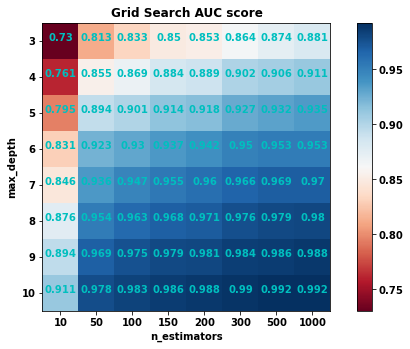

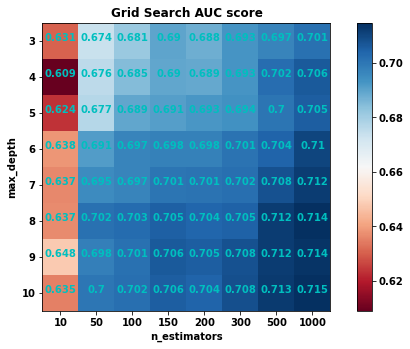

In [69]:
create_heatmap(scores_train)
create_heatmap(scores_test)

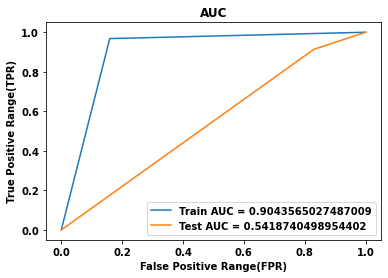

In [70]:
rf = RandomForestClassifier(n_estimators=rf_bow_best_params['n_estimators'],max_depth=rf_bow_best_params['max_depth'],class_weight='balanced',n_jobs=-1)
rf.fit(X=X_BOW_train,y=y_train)
y_train_pred = []
y_test_pred = []
for j in range(0,X_BOW_train.shape[0],100):
    y_train_pred.extend(rf.predict(X=X_BOW_train.tocsr()[j:j+100]))
for j in range(0,X_BOW_test.shape[0],100):
    y_test_pred.extend(rf.predict(X=X_BOW_test.tocsr()[j:j+100]))
train_fpr, train_tpr, thresholds = roc_curve(y_train,y_train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test,y_test_pred)

plt.plot(train_fpr,train_tpr,label = "Train AUC = "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr, label = "Test AUC = "+str(auc(test_fpr,test_tpr)))
BOW_train_auc = auc(train_fpr,train_tpr)
BOW_test_auc = auc(test_fpr,test_tpr)
plt.legend()
plt.xlabel('False Positive Range(FPR)')
plt.ylabel('True Positive Range(TPR)')
plt.title('AUC')
plt.show()

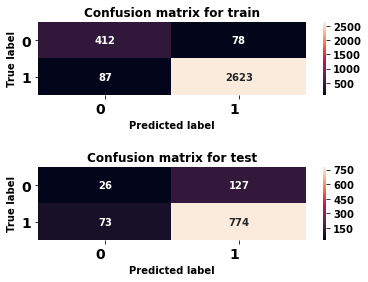

In [71]:
cnf_matrix_train = confusion_matrix(y_train,y_train_pred)
cnf_matrix_test = confusion_matrix(y_test,y_test_pred)
classes = [0,1]
df_cm_train = pd.DataFrame(cnf_matrix_train, columns=classes, index = classes)
df_cm_test = pd.DataFrame(cnf_matrix_test, columns=classes, index=classes)
plt.subplot(211)
try:
    heatmap = sns.heatmap(df_cm_train,annot=True,fmt="d")
except ValueError:
    raise ValueError('Confusion matrix values must be integers')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for train')

plt.subplot(212)
try:
    heatmap = sns.heatmap(df_cm_test,annot=True,fmt="d")
except ValueError:
    raise ValueError('Confusion matrix values must be integers')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for test')
plt.subplots_adjust(hspace=1)

### 2.4.1 Applying Random Forests on TFIDF,<font color='red'> SET 2</font>

In [72]:
clf = RandomForestClassifier(random_state=42,class_weight='balanced',n_jobs=-1)
parameters = [{'n_estimators' : [10, 50, 100, 150, 200, 300, 500, 1000],'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10]}]
grid_search = GridSearchCV(estimator=clf,param_grid=parameters,cv=5,scoring='roc_auc',return_train_score=True,n_jobs=-1)
grid_search.fit(X=X_TFIDF_train,y=y_train)

scores_train = grid_search.cv_results_['mean_train_score'].reshape(len(parameters[0]['n_estimators']),len(parameters[0]['max_depth']))
scores_test = grid_search.cv_results_['mean_test_score'].reshape(len(parameters[0]['n_estimators']),len(parameters[0]['max_depth']))
rf_tfidf_best_params = grid_search.best_params_

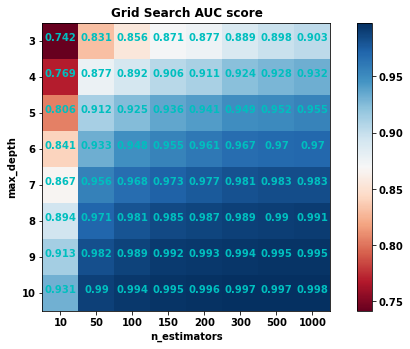

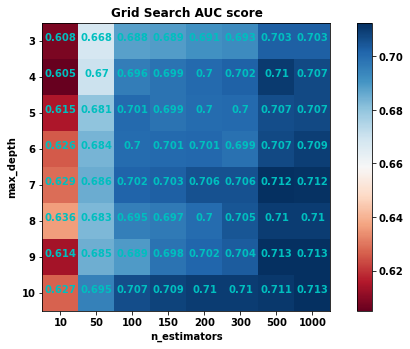

In [73]:
create_heatmap(scores_train)
create_heatmap(scores_test)

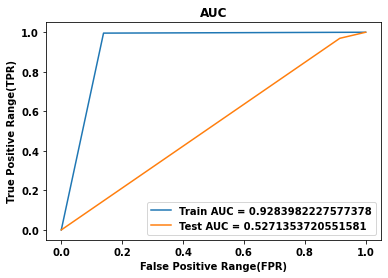

In [74]:
rf = RandomForestClassifier(n_estimators=rf_tfidf_best_params['n_estimators'],max_depth=rf_tfidf_best_params['max_depth'],class_weight='balanced',n_jobs=-1)
rf.fit(X=X_TFIDF_train,y=y_train)
y_train_pred = []
y_test_pred = []
for j in range(0,X_TFIDF_train.shape[0],100):
    y_train_pred.extend(rf.predict(X=X_TFIDF_train.tocsr()[j:j+100]))
for j in range(0,X_TFIDF_test.shape[0],100):
    y_test_pred.extend(rf.predict(X=X_TFIDF_test.tocsr()[j:j+100]))
train_fpr, train_tpr, thresholds = roc_curve(y_train,y_train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test,y_test_pred)

plt.plot(train_fpr,train_tpr,label = "Train AUC = "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr, label = "Test AUC = "+str(auc(test_fpr,test_tpr)))
TFIDF_train_auc = auc(train_fpr,train_tpr)
TFIDF_test_auc = auc(test_fpr,test_tpr)
plt.legend()
plt.xlabel('False Positive Range(FPR)')
plt.ylabel('True Positive Range(TPR)')
plt.title('AUC')
plt.show()

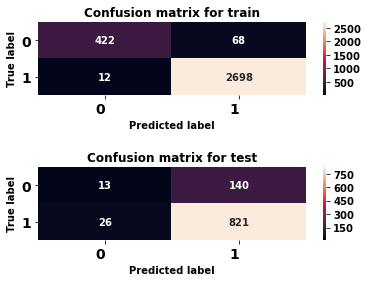

In [75]:
cnf_matrix_train = confusion_matrix(y_train,y_train_pred)
cnf_matrix_test = confusion_matrix(y_test,y_test_pred)
classes = [0,1]
df_cm_train = pd.DataFrame(cnf_matrix_train, columns=classes, index = classes)
df_cm_test = pd.DataFrame(cnf_matrix_test, columns=classes, index=classes)
plt.subplot(211)
try:
    heatmap = sns.heatmap(df_cm_train,annot=True,fmt="d")
except ValueError:
    raise ValueError('Confusion matrix values must be integers')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for train')

plt.subplot(212)
try:
    heatmap = sns.heatmap(df_cm_test,annot=True,fmt="d")
except ValueError:
    raise ValueError('Confusion matrix values must be integers')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for test')
plt.subplots_adjust(hspace=1)

### 2.4.1 Applying Random Forests on AVG W2V,<font color='red'> SET 3</font>

In [76]:
clf = RandomForestClassifier(random_state=42,class_weight='balanced',n_jobs=-1)
parameters = [{'n_estimators' : [10, 50, 100, 150, 200, 300, 500, 1000],'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10]}]
grid_search = GridSearchCV(estimator=clf,param_grid=parameters,cv=5,scoring='roc_auc',return_train_score=True,n_jobs=-1)
grid_search.fit(X=X_avg_w2v_train,y=y_train)

scores_train = grid_search.cv_results_['mean_train_score'].reshape(len(parameters[0]['n_estimators']),len(parameters[0]['max_depth']))
scores_test = grid_search.cv_results_['mean_test_score'].reshape(len(parameters[0]['n_estimators']),len(parameters[0]['max_depth']))
rf_avg_w2v_best_params = grid_search.best_params_

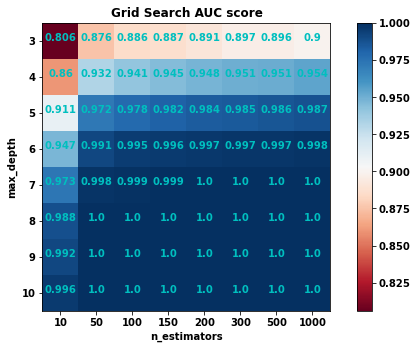

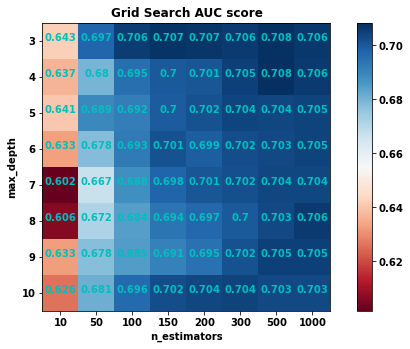

In [77]:
create_heatmap(scores_train)
create_heatmap(scores_test)

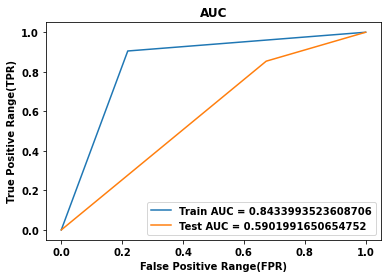

In [78]:
rf = RandomForestClassifier(n_estimators=rf_avg_w2v_best_params['n_estimators'],max_depth=rf_avg_w2v_best_params['max_depth'],class_weight='balanced',n_jobs=-1)
rf.fit(X=X_avg_w2v_train,y=y_train)
y_train_pred = []
y_test_pred = []
for j in range(0,X_avg_w2v_train.shape[0],100):
    y_train_pred.extend(rf.predict(X=X_avg_w2v_train.tocsr()[j:j+100]))
for j in range(0,X_avg_w2v_test.shape[0],100):
    y_test_pred.extend(rf.predict(X=X_avg_w2v_test.tocsr()[j:j+100]))
train_fpr, train_tpr, thresholds = roc_curve(y_train,y_train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test,y_test_pred)

plt.plot(train_fpr,train_tpr,label = "Train AUC = "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr, label = "Test AUC = "+str(auc(test_fpr,test_tpr)))
avg_w2v_train_auc = auc(train_fpr,train_tpr)
avg_w2v_test_auc = auc(test_fpr,test_tpr)
plt.legend()
plt.xlabel('False Positive Range(FPR)')
plt.ylabel('True Positive Range(TPR)')
plt.title('AUC')
plt.show()

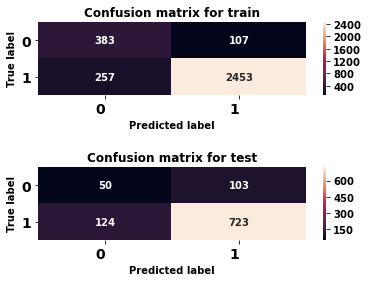

In [79]:
cnf_matrix_train = confusion_matrix(y_train,y_train_pred)
cnf_matrix_test = confusion_matrix(y_test,y_test_pred)
classes = [0,1]
df_cm_train = pd.DataFrame(cnf_matrix_train, columns=classes, index = classes)
df_cm_test = pd.DataFrame(cnf_matrix_test, columns=classes, index=classes)
plt.subplot(211)
try:
    heatmap = sns.heatmap(df_cm_train,annot=True,fmt="d")
except ValueError:
    raise ValueError('Confusion matrix values must be integers')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for train')

plt.subplot(212)
try:
    heatmap = sns.heatmap(df_cm_test,annot=True,fmt="d")
except ValueError:
    raise ValueError('Confusion matrix values must be integers')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for test')
plt.subplots_adjust(hspace=1)

### 2.4.1 Applying Random Forests on TFIDF W2V ,<font color='red'> SET 4</font>

In [80]:
clf = RandomForestClassifier(random_state=42,class_weight='balanced',n_jobs=-1)
parameters = [{'n_estimators' : [10, 50, 100, 150, 200, 300, 500, 1000],'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10]}]
grid_search = GridSearchCV(estimator=clf,param_grid=parameters,cv=5,scoring='roc_auc',return_train_score=True,n_jobs=-1)
grid_search.fit(X=X_tfidf_w2v_train,y=y_train)

scores_train = grid_search.cv_results_['mean_train_score'].reshape(len(parameters[0]['n_estimators']),len(parameters[0]['max_depth']))
scores_test = grid_search.cv_results_['mean_test_score'].reshape(len(parameters[0]['n_estimators']),len(parameters[0]['max_depth']))
rf_tfidf_w2v_best_params = grid_search.best_params_

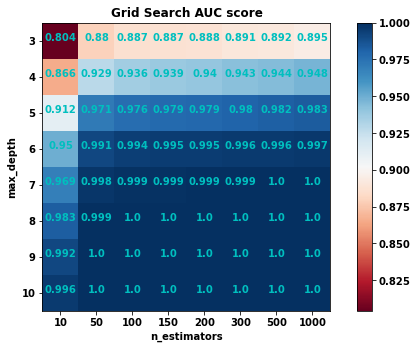

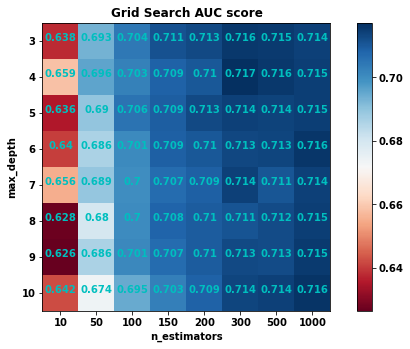

In [81]:
create_heatmap(scores_train)
create_heatmap(scores_test)

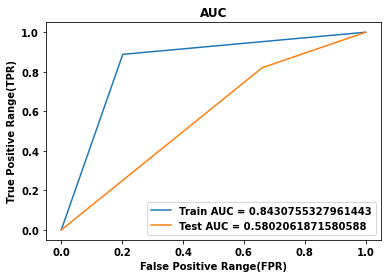

In [82]:
rf = RandomForestClassifier(n_estimators=rf_tfidf_w2v_best_params['n_estimators'],max_depth=rf_tfidf_w2v_best_params['max_depth'],class_weight='balanced',n_jobs=-1)
rf.fit(X=X_tfidf_w2v_train,y=y_train)
y_train_pred = []
y_test_pred = []
for j in range(0,X_tfidf_w2v_train.shape[0],100):
    y_train_pred.extend(rf.predict(X=X_tfidf_w2v_train.tocsr()[j:j+100]))
for j in range(0,X_tfidf_w2v_test.shape[0],100):
    y_test_pred.extend(rf.predict(X=X_tfidf_w2v_test.tocsr()[j:j+100]))
train_fpr, train_tpr, thresholds = roc_curve(y_train,y_train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test,y_test_pred)

plt.plot(train_fpr,train_tpr,label = "Train AUC = "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr, label = "Test AUC = "+str(auc(test_fpr,test_tpr)))
tfidf_w2v_train_auc = auc(train_fpr,train_tpr)
tfidf_w2v_test_auc = auc(test_fpr,test_tpr)
plt.legend()
plt.xlabel('False Positive Range(FPR)')
plt.ylabel('True Positive Range(TPR)')
plt.title('AUC')
plt.show()

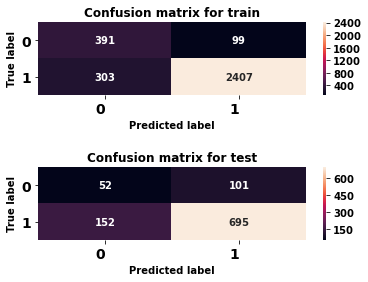

In [83]:
cnf_matrix_train = confusion_matrix(y_train,y_train_pred)
cnf_matrix_test = confusion_matrix(y_test,y_test_pred)
classes = [0,1]
df_cm_train = pd.DataFrame(cnf_matrix_train, columns=classes, index = classes)
df_cm_test = pd.DataFrame(cnf_matrix_test, columns=classes, index=classes)
plt.subplot(211)
try:
    heatmap = sns.heatmap(df_cm_train,annot=True,fmt="d")
except ValueError:
    raise ValueError('Confusion matrix values must be integers')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for train')

plt.subplot(212)
try:
    heatmap = sns.heatmap(df_cm_test,annot=True,fmt="d")
except ValueError:
    raise ValueError('Confusion matrix values must be integers')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for test')
plt.subplots_adjust(hspace=1)

<h2>2.5 Applying GBDT</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying XGBOOST on BOW,<font color='red'> SET 1</font>

In [84]:
xgb_clf = xgb.XGBClassifier()
parameters = [{'n_estimators' : [10, 50, 100, 150, 200, 300, 500, 1000],'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10]}]
grid_search = GridSearchCV(estimator=xgb_clf,param_grid=parameters,cv=5,scoring='roc_auc',return_train_score=True,n_jobs=-1)
grid_search.fit(X=X_BOW_train,y=y_train)

scores_train = grid_search.cv_results_['mean_train_score'].reshape(len(parameters[0]['n_estimators']),len(parameters[0]['max_depth']))
scores_test = grid_search.cv_results_['mean_test_score'].reshape(len(parameters[0]['n_estimators']),len(parameters[0]['max_depth']))
xg_bow_best_params = grid_search.best_params_

[20:05:32] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [85]:
def create_3d_map(grid_search):
    trace1 = go.Scatter3d(x=grid_search.cv_results_['param_n_estimators'],y=grid_search.cv_results_['param_max_depth'],z=scores_train.ravel(), name = 'train')
    trace2 = go.Scatter3d(x=grid_search.cv_results_['param_n_estimators'],y=grid_search.cv_results_['param_max_depth'],z=scores_test.ravel(), name = 'Cross validation')
    data = [trace1, trace2]
    
    layout = go.Layout(scene = dict(
            xaxis = dict(title='n_estimators'),
            yaxis = dict(title='max_depth'),
            zaxis = dict(title='AUC'),))
    
    fig = go.Figure(data=data, layout=layout)
    offline.iplot(fig, filename='3d-scatter-colorscale')

In [86]:
create_3d_map(grid_search)

[20:05:34] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


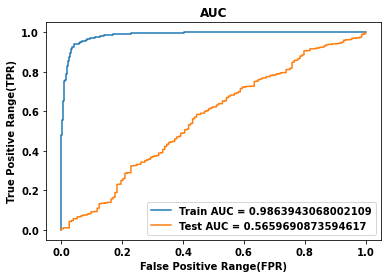

In [87]:
xgb_clf = xgb.XGBClassifier(n_estimators = xg_bow_best_params['n_estimators'],
                            max_depth = xg_bow_best_params['max_depth'],
                           n_jobs = -1)
xgb_clf.fit(X=X_BOW_train,y=y_train)
y_train_pred = []
y_test_pred = []
for j in range(0,X_BOW_train.shape[0],100):
    y_train_pred.extend(xgb_clf.predict_proba(X_BOW_train.tocsr()[j:j+100])[:,1])
for j in range(0,X_BOW_test.shape[0],100):
    y_test_pred.extend(xgb_clf.predict_proba(X_BOW_test.tocsr()[j:j+100])[:,1])
train_fpr, train_tpr, thresholds = roc_curve(y_train,y_train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test,y_test_pred)

plt.plot(train_fpr,train_tpr,label = "Train AUC = "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr, label = "Test AUC = "+str(auc(test_fpr,test_tpr)))
xg_BOW_train_auc = auc(train_fpr,train_tpr)
xg_BOW_test_auc = auc(test_fpr,test_tpr)
plt.legend()
plt.xlabel('False Positive Range(FPR)')
plt.ylabel('True Positive Range(TPR)')
plt.title('AUC')
plt.show()

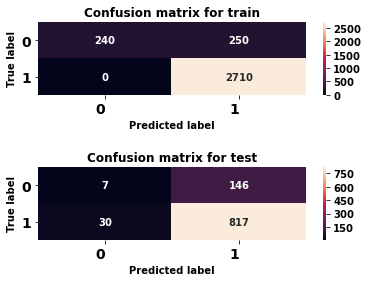

In [88]:
cnf_matrix_train = confusion_matrix(y_train,np.round(y_train_pred))
cnf_matrix_test = confusion_matrix(y_test,np.round(y_test_pred))
classes = [0,1]
df_cm_train = pd.DataFrame(cnf_matrix_train, columns=classes, index = classes)
df_cm_test = pd.DataFrame(cnf_matrix_test, columns=classes, index=classes)
plt.subplot(211)
try:
    heatmap = sns.heatmap(df_cm_train,annot=True,fmt="d")
except ValueError:
    raise ValueError('Confusion matrix values must be integers')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for train')

plt.subplot(212)
try:
    heatmap = sns.heatmap(df_cm_test,annot=True,fmt="d")
except ValueError:
    raise ValueError('Confusion matrix values must be integers')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for test')
plt.subplots_adjust(hspace=1)

### 2.4.1 Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

In [89]:
xgb_clf = xgb.XGBClassifier(random_state=42,n_jobs=-1)
parameters = [{'n_estimators' : [10, 50, 100, 150, 200, 300, 500, 1000],'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10]}]
grid_search = GridSearchCV(estimator=xgb_clf,param_grid=parameters,cv=5,scoring='roc_auc',return_train_score=True,n_jobs=-1)
grid_search.fit(X=X_TFIDF_train,y=y_train)

scores_train = grid_search.cv_results_['mean_train_score'].reshape(len(parameters[0]['n_estimators']),len(parameters[0]['max_depth']))
scores_test = grid_search.cv_results_['mean_test_score'].reshape(len(parameters[0]['n_estimators']),len(parameters[0]['max_depth']))
xg_tfidf_best_params = grid_search.best_params_

[20:29:37] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [90]:
create_3d_map(grid_search)

[20:29:39] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


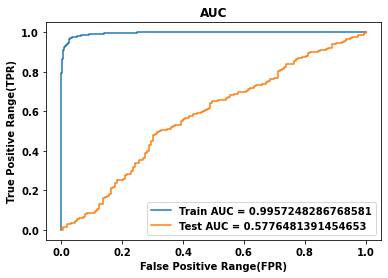

In [91]:
xgb_clf = xgb.XGBClassifier(n_estimators=xg_tfidf_best_params['n_estimators'],max_depth=xg_tfidf_best_params['max_depth'],n_jobs=-1)
xgb_clf.fit(X=X_TFIDF_train,y=y_train)
y_train_pred = []
y_test_pred = []
for j in range(0,X_TFIDF_train.shape[0],100):
    y_train_pred.extend(xgb_clf.predict_proba(X=X_TFIDF_train.tocsr()[j:j+100])[:,1])
for j in range(0,X_TFIDF_test.shape[0],100):
    y_test_pred.extend(xgb_clf.predict_proba(X=X_TFIDF_test.tocsr()[j:j+100])[:,1])
train_fpr, train_tpr, thresholds = roc_curve(y_train,y_train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test,y_test_pred)

plt.plot(train_fpr,train_tpr,label = "Train AUC = "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr, label = "Test AUC = "+str(auc(test_fpr,test_tpr)))
xg_TFIDF_train_auc = auc(train_fpr,train_tpr)
xg_TFIDF_test_auc = auc(test_fpr,test_tpr)
plt.legend()
plt.xlabel('False Positive Range(FPR)')
plt.ylabel('True Positive Range(TPR)')
plt.title('AUC')
plt.show()

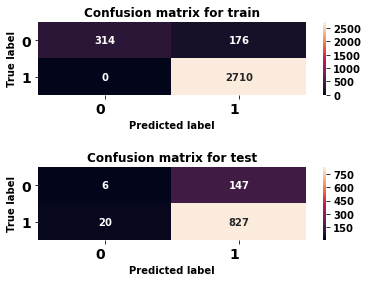

In [92]:
cnf_matrix_train = confusion_matrix(y_train,np.round(y_train_pred))
cnf_matrix_test = confusion_matrix(y_test,np.round(y_test_pred))
classes = [0,1]
df_cm_train = pd.DataFrame(cnf_matrix_train, columns=classes, index = classes)
df_cm_test = pd.DataFrame(cnf_matrix_test, columns=classes, index=classes)
plt.subplot(211)
try:
    heatmap = sns.heatmap(df_cm_train,annot=True,fmt="d")
except ValueError:
    raise ValueError('Confusion matrix values must be integers')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for train')

plt.subplot(212)
try:
    heatmap = sns.heatmap(df_cm_test,annot=True,fmt="d")
except ValueError:
    raise ValueError('Confusion matrix values must be integers')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for test')
plt.subplots_adjust(hspace=1)

### 2.4.1 Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

In [93]:
xgb_clf = RandomForestClassifier()
parameters = [{'n_estimators' : [10, 50, 100, 150, 200, 300, 500, 1000],'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10]}]
grid_search = GridSearchCV(estimator=xgb_clf,param_grid=parameters,cv=5,scoring='roc_auc',return_train_score=True,n_jobs=-1)
grid_search.fit(X=X_avg_w2v_train,y=y_train)

scores_train = grid_search.cv_results_['mean_train_score'].reshape(len(parameters[0]['n_estimators']),len(parameters[0]['max_depth']))
scores_test = grid_search.cv_results_['mean_test_score'].reshape(len(parameters[0]['n_estimators']),len(parameters[0]['max_depth']))
xg_avg_w2v_best_params = grid_search.best_params_

In [94]:
create_3d_map(grid_search)

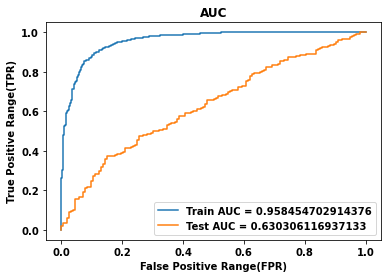

In [95]:
xgb_clf = RandomForestClassifier(n_estimators=xg_avg_w2v_best_params['n_estimators'],max_depth=xg_avg_w2v_best_params['max_depth'],n_jobs=-1)
xgb_clf.fit(X=X_avg_w2v_train,y=y_train)
y_train_pred = []
y_test_pred = []
for j in range(0,X_avg_w2v_train.shape[0],100):
    y_train_pred.extend(xgb_clf.predict_proba(X=X_avg_w2v_train.tocsr()[j:j+100])[:,1])
for j in range(0,X_avg_w2v_test.shape[0],100):
    y_test_pred.extend(xgb_clf.predict_proba(X=X_avg_w2v_test.tocsr()[j:j+100])[:,1])
train_fpr, train_tpr, thresholds = roc_curve(y_train,y_train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test,y_test_pred)

plt.plot(train_fpr,train_tpr,label = "Train AUC = "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr, label = "Test AUC = "+str(auc(test_fpr,test_tpr)))
xg_avg_w2v_train_auc = auc(train_fpr,train_tpr)
xg_avg_w2v_test_auc = auc(test_fpr,test_tpr)
plt.legend()
plt.xlabel('False Positive Range(FPR)')
plt.ylabel('True Positive Range(TPR)')
plt.title('AUC')
plt.show()

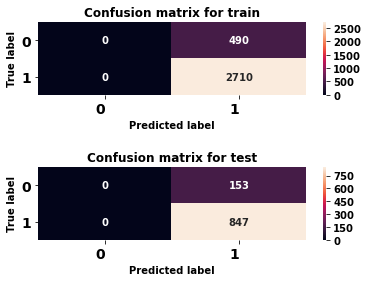

In [96]:
cnf_matrix_train = confusion_matrix(y_train,np.round(y_train_pred))
cnf_matrix_test = confusion_matrix(y_test,np.round(y_test_pred))
classes = [0,1]
df_cm_train = pd.DataFrame(cnf_matrix_train, columns=classes, index = classes)
df_cm_test = pd.DataFrame(cnf_matrix_test, columns=classes, index=classes)
plt.subplot(211)
try:
    heatmap = sns.heatmap(df_cm_train,annot=True,fmt="d")
except ValueError:
    raise ValueError('Confusion matrix values must be integers')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for train')

plt.subplot(212)
try:
    heatmap = sns.heatmap(df_cm_test,annot=True,fmt="d")
except ValueError:
    raise ValueError('Confusion matrix values must be integers')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for test')
plt.subplots_adjust(hspace=1)

### 2.4.1 Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

In [97]:
xgb_clf = RandomForestClassifier()
parameters = [{'n_estimators' : [10, 50, 100, 150, 200, 300, 500, 1000],'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10]}]
grid_search = GridSearchCV(estimator=xgb_clf,param_grid=parameters,cv=5,scoring='roc_auc',return_train_score=True,n_jobs=-1)
grid_search.fit(X=X_tfidf_w2v_train,y=y_train)

scores_train = grid_search.cv_results_['mean_train_score'].reshape(len(parameters[0]['n_estimators']),len(parameters[0]['max_depth']))
scores_test = grid_search.cv_results_['mean_test_score'].reshape(len(parameters[0]['n_estimators']),len(parameters[0]['max_depth']))
xg_tfidf_w2v_best_params = grid_search.best_params_

In [98]:
create_3d_map(grid_search)

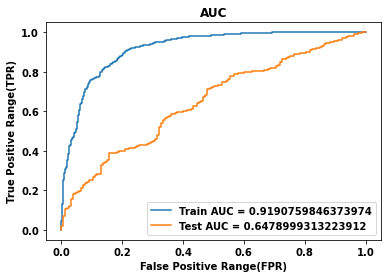

In [99]:
xgb_clf = RandomForestClassifier(n_estimators=xg_tfidf_w2v_best_params['n_estimators'],max_depth=xg_tfidf_w2v_best_params['max_depth'],n_jobs=-1)
xgb_clf.fit(X=X_tfidf_w2v_train,y=y_train)
y_train_pred = []
y_test_pred = []
for j in range(0,X_tfidf_w2v_train.shape[0],100):
    y_train_pred.extend(xgb_clf.predict_proba(X=X_tfidf_w2v_train.tocsr()[j:j+100])[:,1])
for j in range(0,X_tfidf_w2v_test.shape[0],100):
    y_test_pred.extend(xgb_clf.predict_proba(X=X_tfidf_w2v_test.tocsr()[j:j+100])[:,1])
train_fpr, train_tpr, thresholds = roc_curve(y_train,y_train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test,y_test_pred)

plt.plot(train_fpr,train_tpr,label = "Train AUC = "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr, label = "Test AUC = "+str(auc(test_fpr,test_tpr)))
xg_tfidf_w2v_train_auc = auc(train_fpr,train_tpr)
xg_tfidf_w2v_test_auc = auc(test_fpr,test_tpr)
plt.legend()
plt.xlabel('False Positive Range(FPR)')
plt.ylabel('True Positive Range(TPR)')
plt.title('AUC')
plt.show()

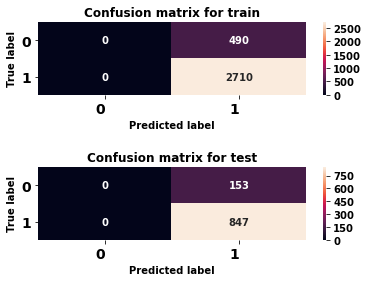

In [100]:
cnf_matrix_train = confusion_matrix(y_train,np.round(y_train_pred))
cnf_matrix_test = confusion_matrix(y_test,np.round(y_test_pred))
classes = [0,1]
df_cm_train = pd.DataFrame(cnf_matrix_train, columns=classes, index = classes)
df_cm_test = pd.DataFrame(cnf_matrix_test, columns=classes, index=classes)
plt.subplot(211)
try:
    heatmap = sns.heatmap(df_cm_train,annot=True,fmt="d")
except ValueError:
    raise ValueError('Confusion matrix values must be integers')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for train')

plt.subplot(212)
try:
    heatmap = sns.heatmap(df_cm_test,annot=True,fmt="d")
except ValueError:
    raise ValueError('Confusion matrix values must be integers')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation = 0,ha = "right", fontsize = 14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for test')
plt.subplots_adjust(hspace=1)

<h1>3. Conclusions</h1>

In [101]:
# Please compare all your models using Prettytable library

In [102]:
from prettytable import PrettyTable
table = PrettyTable(['Vectorizer','Max Depth','n estimators','Train AUC','Test AUC'])
table.add_row(['BOW',rf_bow_best_params['max_depth'],rf_bow_best_params['n_estimators'],BOW_train_auc,BOW_test_auc])
table.add_row(['TFIDF',rf_tfidf_best_params['max_depth'],rf_tfidf_best_params['n_estimators'],TFIDF_train_auc,TFIDF_test_auc])
table.add_row(['AVG W2V',rf_avg_w2v_best_params['max_depth'],rf_avg_w2v_best_params['n_estimators'],avg_w2v_train_auc,avg_w2v_test_auc])
table.add_row(['TFIDF_w2v',rf_tfidf_w2v_best_params['max_depth'],rf_tfidf_w2v_best_params['n_estimators'],tfidf_w2v_train_auc,tfidf_w2v_test_auc])

table.add_row(['XGB_BOW',xg_bow_best_params['max_depth'],xg_bow_best_params['n_estimators'],xg_BOW_train_auc,xg_BOW_test_auc])
table.add_row(['XGB_TFIDF',xg_tfidf_best_params['max_depth'],xg_tfidf_best_params['n_estimators'],xg_TFIDF_train_auc,xg_TFIDF_test_auc])
table.add_row(['XGB_AVG W2V',xg_avg_w2v_best_params['max_depth'],xg_avg_w2v_best_params['n_estimators'],xg_avg_w2v_train_auc,xg_avg_w2v_test_auc])
table.add_row(['XGB_TFIDF_w2v',xg_tfidf_w2v_best_params['max_depth'],xg_tfidf_w2v_best_params['n_estimators'],xg_tfidf_w2v_train_auc,xg_tfidf_w2v_test_auc])

print(table)

+---------------+-----------+--------------+--------------------+--------------------+
|   Vectorizer  | Max Depth | n estimators |     Train AUC      |      Test AUC      |
+---------------+-----------+--------------+--------------------+--------------------+
|      BOW      |     10    |     1000     | 0.9043565027487009 | 0.5418740498954402 |
|     TFIDF     |     10    |     1000     | 0.9283982227577378 | 0.5271353720551581 |
|    AVG W2V    |     4     |     500      | 0.8433993523608706 | 0.5901991650654752 |
|   TFIDF_w2v   |     4     |     300      | 0.8430755327961443 | 0.5802061871580588 |
|    XGB_BOW    |     4     |      50      | 0.9863943068002109 | 0.5659690873594617 |
|   XGB_TFIDF   |     4     |      50      | 0.9957248286768581 | 0.5776481391454653 |
|  XGB_AVG W2V  |     5     |     300      | 0.958454702914376  | 0.630306116937133  |
| XGB_TFIDF_w2v |     4     |     1000     | 0.9190759846373974 | 0.6478999313223912 |
+---------------+-----------+--------------